## Exercise 2: Power Spectrum Analysis (FFT)
**Objective:** Compute and plot the power spectrum of an EEG signal.
- **Libraries:** `numpy`, `matplotlib`
- **Tasks:**
  - Apply Fast Fourier Transform (FFT) to an EEG signal.
  - Plot the power spectrum (frequency vs. power).
- **Expected Output:** Power spectrum plot with prominent EEG frequency bands.

In [80]:
import numpy as np 
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci

from scipy.fft import fft, fftfreq

%matplotlib inline

### Load Data

In [43]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder /
                         "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif")
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(10, 70).pick(picks=["eeg"]).load_data().resample(200)

orig_raw = raw.copy()

Opening raw data file C:\Users\USER\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 9009  =      0.000 ...    59.999 secs...


Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


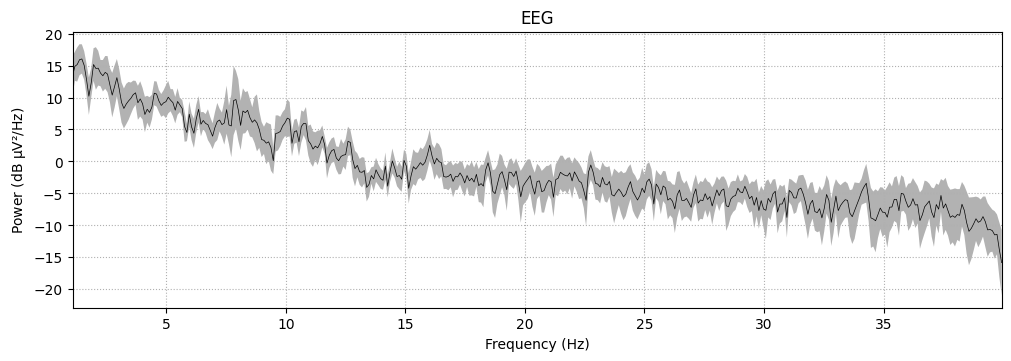

In [44]:
raw.compute_psd(fmin=1.0, fmax=40.0).plot(average=True, amplitude=False, picks="data", exclude="bads");

Effective window size : 10.240 (s)


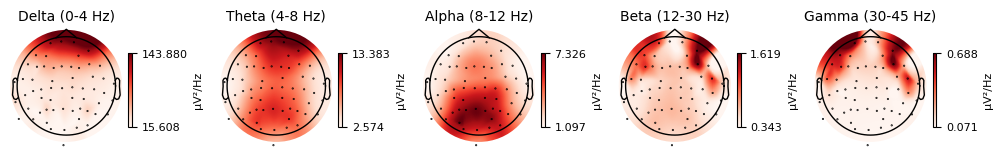

In [67]:
raw.compute_psd().plot_topomap(normalize=False, contours=0); 

In [82]:
raw.info['sfreq']

200.0

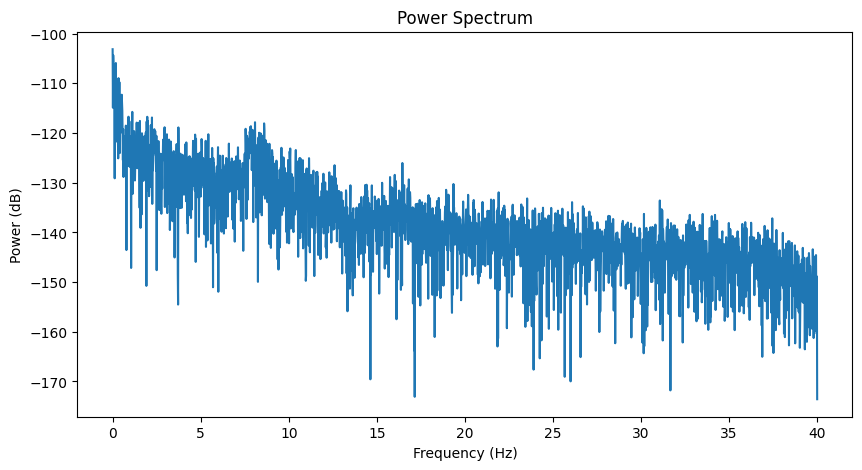

In [92]:

data = raw.get_data()
x = data[50, :]  # i think it's occipital one , for alpha 

# FFT parameters
N = len(x)                 # Number of data points
T = 1 / raw.info['sfreq']  # Sampling interval
yf = fft(x)                # Apply FFT
xf = fftfreq(N, T)[:N//2]  # Frequency values up to Nyquist frequency (N/2)

# normalize and calculate power
yf_power = (2.0 / N * np.abs(yf[:N//2]))**2  # Compute power (amplitude squared)

# filter to plot only frequencies up to 40 Hz
max_freq = 40
valid_indices = xf <= max_freq  
xf = xf[valid_indices]  
yf_power = yf_power[valid_indices] 

# convert power to decibels (dB)
yf_db = 10 * np.log10(yf_power)

# plot 
plt.figure(figsize=(10, 5))
plt.plot(xf, yf_db)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.show()


### References 
* https://mne.tools/stable/auto_tutorials/time-freq/20_sensors_time_frequency.html
* https://medium.com/0xcode/fast-fourier-transform-fft-algorithm-implementation-in-python-b592099bdb27
* https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html

and previous exercises. 